### Monte Carlo Estimation ###

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
import random as rdm

$$ f(x) = \int_0^1 x^{-\alpha} e^{-x} \;dx $$

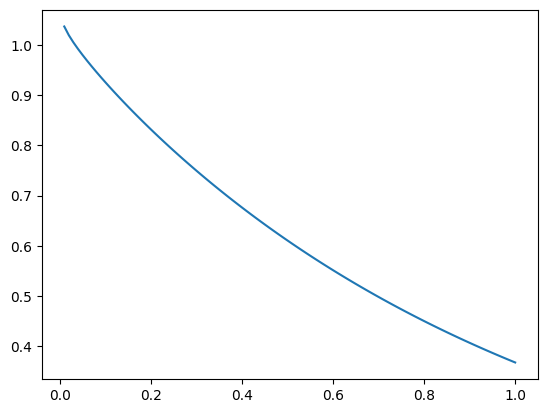

Integral: 0.6401766289899836


In [46]:
alpha = 0.01
f = lambda x: x**(-alpha) * np.exp(-x)
X = np.mgrid[1e-2:1:100j];

plt.plot(X, f(X))
plt.show()

result, error = quad(f, 0, 1)
print("Integral:", result)

In [51]:
n = 100000
x_bound = (0, 1)
y_bound = (0, 1.6)
eval_steps = [10, 100, 1000, 10000]

def calcArea(counts, n):
    return ((x_bound[1] - x_bound[0]) * (y_bound[1] - y_bound[0])) * (counts / n)

counts = 0
for i in range(n):
    rdm_x = x_bound[0] + rdm.random() * (x_bound[1] - x_bound[0])
    rdm_y = y_bound[0] + rdm.random() * (y_bound[1] - y_bound[0])

    if f(rdm_x) > rdm_y:
        counts += 1

    for j in range(len(eval_steps)):
        if (i == eval_steps[j]):
            print("n =", eval_steps[j], ":", calcArea(counts, n))

print("n =", n, ":", calcArea(counts, n))
print("integral: ", result)

n = 10 : 4.8e-05
n = 100 : 0.0006720000000000001
n = 1000 : 0.00664
n = 10000 : 0.06392
n = 100000 : 0.644112
integral:  0.6401766289899836
